## PIL

In [1]:
from PIL import Image
import numpy as np

In [2]:
img = Image.open('Lenna.jpg')
print(img.format)
print(img.size) #注意，省略了通道 (w，h)
print(img.mode) #L 为灰度图，RGB 为真彩色,RGBA 为加了透明通道
img.show() # 显示图片

JPEG
(200, 200)
RGB


In [3]:
gray = Image.open('Lenna.jpg').convert('L')
gray.show()

In [4]:
#pillow 读进来的图片不是矩阵，我们将图片转矩阵,channel last
arr = np.array(img)
print(arr.shape)
print(arr.dtype)
print(arr)


(200, 200, 3)
uint8
[[[224 152 114]
  [226 154 114]
  [228 156 116]
  ...
  [220 151 120]
  [234 170 142]
  [223 163 137]]

 [[223 151 111]
  [225 154 112]
  [227 154 111]
  ...
  [213 146 117]
  [225 164 136]
  [228 172 147]]

 [[222 149 104]
  [223 150 105]
  [224 152 104]
  ...
  [173 112  84]
  [145  89  66]
  [138  86  64]]

 ...

 [[ 35  31  19]
  [ 43  37  25]
  [ 34  26  15]
  ...
  [ 70  43  26]
  [ 84  55  37]
  [ 91  58  39]]

 [[ 30  26  14]
  [ 42  36  24]
  [ 31  23  12]
  ...
  [ 85  56  40]
  [109  76  59]
  [115  80  61]]

 [[ 28  24  12]
  [ 42  36  24]
  [ 31  23  12]
  ...
  [ 95  64  46]
  [123  88  69]
  [128  89  72]]]


In [5]:
#矩阵再转为图像
new_im = Image.fromarray(arr)
new_im.save('3.png')

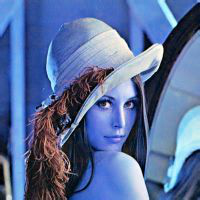

In [6]:
#分离合并通道
r, g, b = img.split()
img = Image.merge("RGB", (b, g, r))
img

In [7]:
box = (100,100,200,200)
region = img.crop(box)
region = region.transpose(Image.ROTATE_180)
#旋转 180°
img.paste(region,box)
region.show()

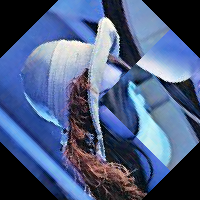

In [8]:
out = img.resize((58,58))
out = img.rotate(45)
out

## matplotlib：matplotlib.image.imread

In [9]:
import matplotlib.pyplot as plt
import numpy as np


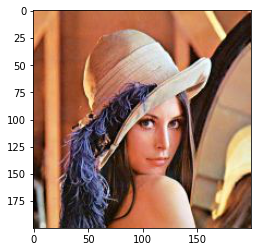

In [10]:
image = plt.imread('Lenna.jpg')
plt.imshow(image)
plt.show()

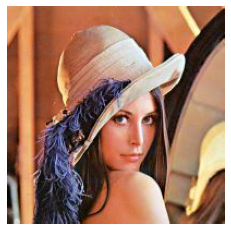

In [11]:
#也可以关闭显示 x，y 轴上的数字
plt.imshow(image)
plt.axis('off')
plt.show()

(200, 200, 3)
120000
uint8
[[[224 152 114]
  [226 154 114]
  [228 156 116]
  ...
  [220 151 120]
  [234 170 142]
  [223 163 137]]

 [[223 151 111]
  [225 154 112]
  [227 154 111]
  ...
  [213 146 117]
  [225 164 136]
  [228 172 147]]

 [[222 149 104]
  [223 150 105]
  [224 152 104]
  ...
  [173 112  84]
  [145  89  66]
  [138  86  64]]

 ...

 [[ 35  31  19]
  [ 43  37  25]
  [ 34  26  15]
  ...
  [ 70  43  26]
  [ 84  55  37]
  [ 91  58  39]]

 [[ 30  26  14]
  [ 42  36  24]
  [ 31  23  12]
  ...
  [ 85  56  40]
  [109  76  59]
  [115  80  61]]

 [[ 28  24  12]
  [ 42  36  24]
  [ 31  23  12]
  ...
  [ 95  64  46]
  [123  88  69]
  [128  89  72]]]


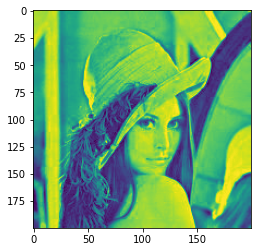

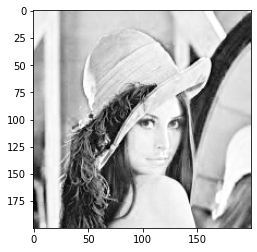

In [14]:
#plt.imread 读入的就是一个矩阵
print(image.shape) # (h,w,c)
print(image.size)
print(image.dtype)
print(image)
im_r = image[:,:,0] #红色通道
plt.imshow(im_r)
plt.show()
#此时会发现显示的是热量图，不是我们预想的灰度图，可以添加 cmap 参数解决
plt.imshow(im_r,cmap='Greys_r')
plt.show()

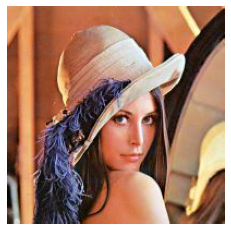

In [15]:
#pillow 和 matplotlib 结合
from PIL import Image
im3 = Image.open('Lenna.jpg')
im3 = np.array(im3)
plt.figure(1)
plt.imshow(im3)
plt.axis('off')
#存储图像，注意，必须在 show 之前 savefig，否则存储的图片一片空白
plt.savefig('timo.jpg')
plt.show()


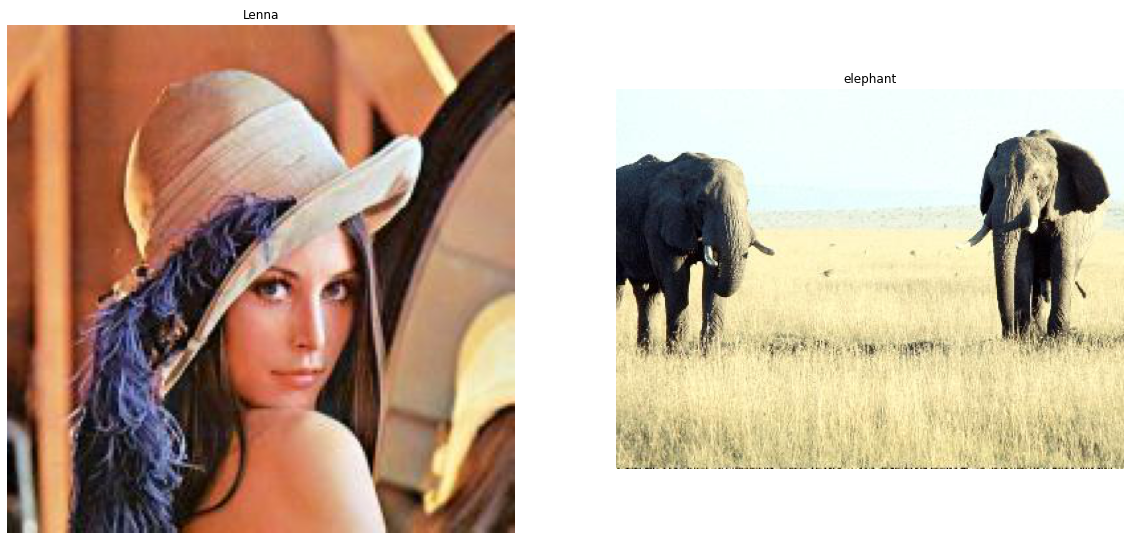

In [19]:
#最后以一个综合例子总结 matplotlib 最基本的图片显示技巧
im_lol1 = plt.imread('Lenna.jpg')
im_lol2 = plt.imread('elephant.jpg')
figure = plt.figure(figsize=(20,10)) # 调整显示图片的大小
'''
figsize 参数：指定绘图对象的宽度和高度，单位为英寸；dpi 参数指定绘图对象的分辨率，
即每英寸多少个像素，缺省值为 80。因此本例中所创建的图表窗口的宽度为 8*80 = 640 像素
'''
plt.axis("off")#不显示刻度
ax = figure.add_subplot(121) # 图片以 1 行 2 列的形式显示
plt.axis('off')
ax.imshow(im_lol1) #第一张图
ax.set_title('Lenna')#给图片加 titile
ax = figure.add_subplot(122)
plt.axis('off')
ax.imshow(im_lol2)
ax.set_title('elephant')#给图片加 titile
plt.savefig('twp.jpg')
plt.show()


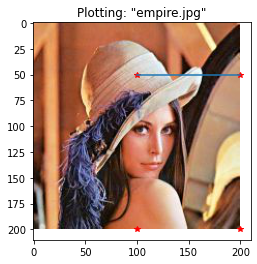

In [20]:
from PIL import Image
from pylab import *
# 读取图像到数组中
im = array(Image.open('Lenna.jpg'))
# 绘制图像
imshow(im)
# 一些点
x = [100,200,100,200]
y = [50,50,200,200]
# 使用红色星状标记绘制点
plot(x,y,'r*')
# 绘制连接前两个点的线
plot(x[:2],y[:2])
# 添加标题，显示绘制的图像
title('Plotting: "empire.jpg"')
show()


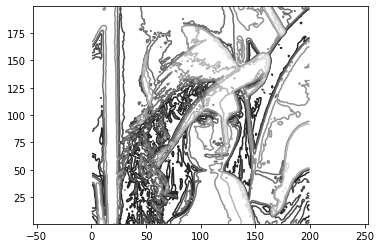

In [21]:
from PIL import Image
from pylab import *
# 读取图像到数组中
im = array(Image.open('Lenna.jpg').convert('L'))
# 新建一个图像
figure()
# 不使用颜色信息
gray()
# 在原点的左上角显示轮廓图像
contour(im, origin='image')
axis('equal')
show()


## DFT

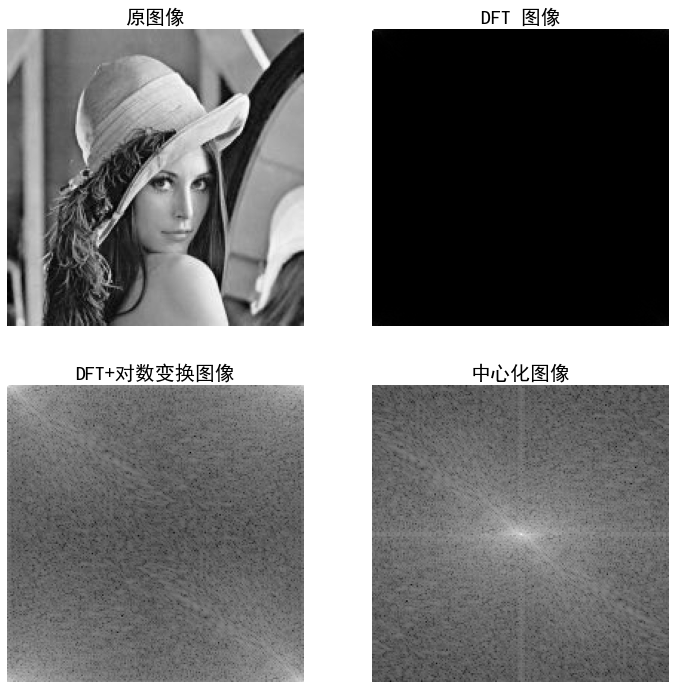

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
img_path = "Lenna.jpg"
src = np.array(Image.open(img_path).convert("L"))
dft_src = np.fft.fft2(src)
log_src = np.log(1 + np.abs(dft_src))
ctr_src = np.fft.fftshift(log_src)
img_list = [src, dft_src, log_src, ctr_src]
img_list_name = ["原图像", "DFT 图像", "DFT+对数变换图像", "中心化图像"]
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
_, img_xy = plt.subplots(2, 2, figsize=(12, 12))
for i in range(2):
 for j in range(2):
    img_xy[i][j].imshow(np.abs(img_list[i * 2 + j]), cmap="gray")
    img_xy[i][j].set_title(img_list_name[i * 2 + j], size=20)
    img_xy[i][j].axis("off")
plt.show()


In [24]:
im = array(Image.open('Lenna.jpg'))
print(im.shape, im.dtype)
im = array(Image.open('Lenna.jpg').convert('L'),'f')
print(im.shape, im.dtype)


(200, 200, 3) uint8
(200, 200) float32


In [25]:
i=10;j=20
im[i,:] = im[j,:] # 将第 j 行的数值赋值给第 i 行
im[:,i] = 100 # 将第 i 列的所有数值设为 100
im[:100,:50].sum() # 计算前 100 行、前 50 列所有数值的和
im[50:100,50:100] # 50~100 行，50~100 列（不包括第 100 行和第 100 列）
im[i].mean() # 第 i 行所有数值的平均值
im[:,-1] # 最后一列
im[-2,:] # 倒数第二行


array([ 26.,  36.,  24.,  35.,  37.,  70., 167., 218., 212., 215., 100.,
       200., 117., 120., 141., 162., 183., 192., 188., 190., 193., 196.,
       184., 143.,  87.,  37.,  36.,  15.,  23.,  24.,  15.,  34.,  41.,
        38.,  43.,  55.,  61.,  66.,  30.,  43.,  58.,  53., 105.,  43.,
        33.,  40.,  91.,  76.,  47.,  70.,  96., 105.,  26.,  47., 125.,
        57.,  26.,  27.,  70.,  65.,  31.,  21.,  48.,  81.,  53., 116.,
        99.,  34.,  19.,  50.,  66.,  62.,  81.,  91., 100., 104., 107.,
       112., 117., 119., 120., 124., 127., 127., 126., 125., 126., 128.,
       129., 131., 133., 133., 132., 133., 136., 139., 140., 139., 137.,
       137., 140., 143., 145., 146., 145., 147., 150., 151., 151., 150.,
       149., 150., 152., 152., 152., 153., 153., 154., 154., 154., 153.,
       154., 155., 156., 158., 160., 162., 164., 171., 173., 174., 176.,
       178., 182., 187., 190., 199., 202., 206., 211., 214., 218., 221.,
       224., 227., 231., 231., 238., 235.,  98.,  6

0 255
0 255
100 200
0 255


Text(0.5, 1.0, '$f(x)=255(\\frac{x}{255})^2$')

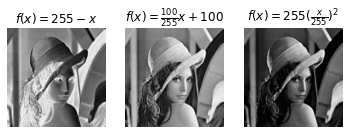

In [27]:
from PIL import Image
from numpy import *
from pylab import *
im = array(Image.open('Lenna.jpg').convert('L'))
print(int(im.min()), int(im.max()))
im2 = 255 - im # 对图像进行反向处理
print(int(im2.min()), int(im2.max())) # 查看最大/最小元素
im3 = (100.0 / 255) * im + 100 # 将图像像素值变换到 100...200 区间
print(int(im3.min()), int(im3.max()))
im4 = 255.0 * (im / 255.0) ** 2 # 对像素值求平方后得到的图像
print(int(im4.min()), int(im4.max()))
figure()
gray()
subplot(131)
imshow(im2)
axis('off')
title(r'$f(x)=255-x$')
subplot(132)
imshow(im3)
axis('off')
title(r'$f(x)=\frac{100}{255}x+100$')
subplot(133)
imshow(im4)
axis('off')
title(r'$f(x)=255(\frac{x}{255})^2$')

## Scipy

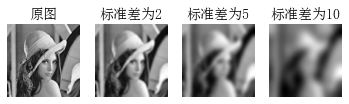

In [28]:
from PIL import Image
from numpy import *
from pylab import *
from scipy.ndimage import filters
# 添加中文字体支持
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)
im = array(Image.open('Lenna.jpg').convert('L'))
figure()
gray()
axis('off')
subplot(141)
axis('off')
title(u'原图', fontproperties=font)
imshow(im)
for bi, blur in enumerate([2, 5, 10]):
 im2 = zeros(im.shape)
 im2 = filters.gaussian_filter(im, blur)
 im2 = np.uint8(im2)
 imNum = str(blur)
 subplot(1, 4, 2 + bi)
 axis('off')
 title(u'标准差为' + imNum, fontproperties=font)
 imshow(im2)
show()

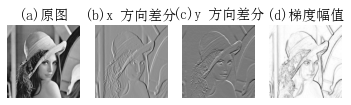

In [29]:
from PIL import Image
from pylab import *
from scipy.ndimage import filters
import numpy
# 添加中文字体支持
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)
im = array(Image.open('Lenna.jpg').convert('L'))
gray()
subplot(141)
axis('off')
title(u'(a)原图', fontproperties=font)
imshow(im)
# sobel derivative filters
imx = zeros(im.shape)
filters.sobel(im, 1, imx)
subplot(142)
axis('off')
title(u'(b)x 方向差分', fontproperties=font)
imshow(imx)
imy = zeros(im.shape)
filters.sobel(im, 0, imy)
subplot(143)
axis('off')
title(u'(c)y 方向差分', fontproperties=font)
imshow(imy)
mag = 255 - numpy.sqrt(imx ** 2 + imy ** 2)
subplot(144)
title(u'(d)梯度幅值', fontproperties=font)
axis('off')
imshow(mag)
show()

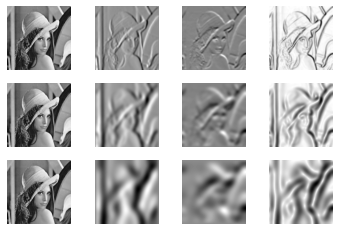

In [30]:
from PIL import Image
from pylab import *
from scipy.ndimage import filters
import numpy
# 添加中文字体支持
# from matplotlib.font_manager import FontProperties
# font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)
def imx(im, sigma):
 imgx = zeros(im.shape)
 filters.gaussian_filter(im, sigma, (0, 1), imgx)
 return imgx
def imy(im, sigma):
 imgy = zeros(im.shape)
 filters.gaussian_filter(im, sigma, (1, 0), imgy)
 return imgy
def mag(im, sigma):
 # there's also gaussian_gradient_magnitude()
 # mag = numpy.sqrt(imgx**2 + imgy**2)
 imgmag = 255 - numpy.sqrt(imgx ** 2 + imgy ** 2)
 return imgmag
im = array(Image.open('Lenna.jpg').convert('L'))
figure()
gray()
sigma = [2, 5, 10]
for i in sigma:
 subplot(3, 4, 4 * (sigma.index(i)) + 1)
 axis('off')
 imshow(im)
 imgx = imx(im, i)
 subplot(3, 4, 4 * (sigma.index(i)) + 2)
 axis('off')
 imshow(imgx)
 imgy = imy(im, i)
 subplot(3, 4, 4 * (sigma.index(i)) + 3)
 axis('off')
 imshow(imgy)
 imgmag = mag(im, i)
 subplot(3, 4, 4 * (sigma.index(i)) + 4)
 axis('off')
 imshow(imgmag)
show()
